In [931]:
import pandas as pd
import numpy as np

In [932]:
df = pd.read_csv('StudentsPerformance.csv')

In [933]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [934]:
df["gender"].replace({"male": 1, "female": 0}, inplace=True)
df['race/ethnicity'].replace({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}, inplace=True)
df['parental level of education'].replace({'some high school': 0, 'high school': 1, "associate's degree" : 2, 'some college': 3, "bachelor's degree": 4, "master's degree": 5}, inplace = True)
df['lunch'].replace({'standard': 0, 'free/reduced': 1}, inplace = True)
df['test preparation course'].replace({'none': 0, 'completed': 1}, inplace = True)

In [935]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,4,0,0,72,72,74
1,0,2,3,0,1,69,90,88
2,0,1,5,0,0,90,95,93
3,1,0,2,1,0,47,57,44
4,1,2,3,0,0,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95
996,1,2,1,1,0,62,55,55
997,0,2,1,1,1,59,71,65
998,0,3,3,0,1,68,78,77


In [936]:
df.columns=['gender', 'race_or_ethnicity','parental_level_of_education','lunch','test_preparation_course','math_score','reading_score','writing_score']
df

,gender,race_or_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,4,0,0,72,72,74
1,0,2,3,0,1,69,90,88
2,0,1,5,0,0,90,95,93
3,1,0,2,1,0,47,57,44
4,1,2,3,0,0,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95
996,1,2,1,1,0,62,55,55
997,0,2,1,1,1,59,71,65
998,0,3,3,0,1,68,78,77


In [937]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [938]:
x = df[['math_score','reading_score']].values
x

array([[72, 72],
       [69, 90],
       [90, 95],
       ...,
       [59, 71],
       [68, 78],
       [77, 86]], dtype=int64)

Text(0, 0.5, 'reading score')

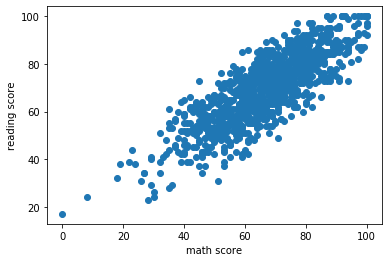

In [939]:
plt.scatter(x[:,0],x[:,1])
plt.xlabel('math score')
plt.ylabel('reading score')

In [940]:
Err = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    print(i,"->",kmeans.inertia_)
    Err.append(kmeans.inertia_)

1 -> 442641.51800000004
2 -> 184873.97883776695
3 -> 115189.61705742305
4 -> 88667.83006400213
5 -> 72779.4573433269
6 -> 62476.32179312679
7 -> 54119.675831488334
8 -> 47241.364680321094
9 -> 41048.18995504
10 -> 36833.43047829851


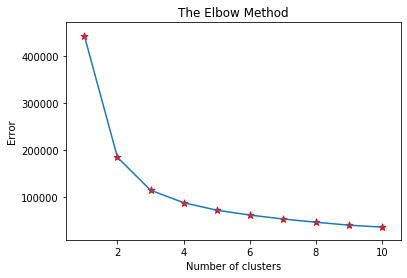

In [941]:
plt.plot(range(1, 11), Err)
plt.scatter(range(1, 11), Err, c='r', marker='*',s=50)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

In [942]:
kmeans = KMeans(n_clusters = 5, random_state=3)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [943]:
y_kmeans

array([1, 1, 3, 2, 1, 1, 3, 4, 0, 2, 2, 2, 1, 1, 2, 1, 3, 4, 4, 2, 0, 1,
       2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 4, 3, 1, 1, 2, 3, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 3, 2, 1, 2, 3, 1, 4, 3, 2, 2, 4, 1, 4, 0, 1, 2, 0,
       4, 0, 0, 2, 0, 0, 2, 0, 2, 4, 4, 1, 0, 0, 2, 2, 2, 0, 4, 1, 1, 1,
       0, 1, 0, 4, 1, 4, 3, 1, 0, 0, 0, 0, 1, 1, 3, 2, 3, 0, 3, 0, 0, 0,
       3, 2, 2, 2, 3, 1, 1, 1, 2, 0, 3, 3, 3, 0, 3, 3, 0, 1, 3, 2, 3, 4,
       1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 1, 4, 3, 1, 1, 3, 0, 1, 0, 2,
       0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 3, 3, 2, 0, 1, 1, 1, 3, 3, 0, 2, 3,
       2, 1, 0, 3, 0, 2, 2, 0, 2, 0, 1, 0, 2, 3, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 4, 2, 2, 3, 3, 3, 4, 1, 2,
       0, 3, 0, 3, 2, 2, 1, 2, 1, 3, 0, 4, 1, 3, 3, 1, 0, 0, 2, 3, 1, 1,
       2, 2, 1, 1, 3, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 3,
       1, 2, 0, 1, 3, 1, 0, 2, 2, 0, 3, 1, 3, 0, 1, 0, 2, 2, 1, 1, 4, 3,
       3, 1, 3, 1, 1, 1, 0, 0, 1, 0, 4, 1, 4, 3, 1,

In [944]:
clusters = kmeans.cluster_centers_
clusters

array([[63.5971223 , 66.00359712],
       [73.31654676, 77.17266187],
       [51.25462963, 55.18518519],
       [87.06395349, 88.61046512],
       [35.375     , 39.375     ]])

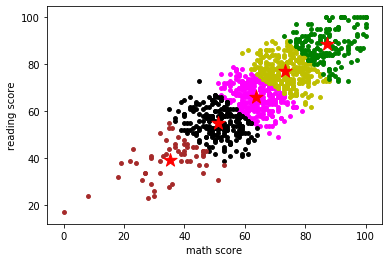

In [945]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 15, c = 'magenta')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 15, c = 'y')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 15, c = 'black')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 15, c = 'green')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 15, c = 'brown')
plt.scatter(clusters[0][0],clusters[0][1],c='r',s=195,marker='*')
plt.scatter(clusters[1][0],clusters[1][1],c='r',s=195, marker='*')
plt.scatter(clusters[2][0],clusters[2][1],c='r',s=195, marker='*')
plt.scatter(clusters[3][0],clusters[3][1],c='r',s=195, marker='*')
plt.scatter(clusters[4][0],clusters[4][1],c='r',s=195, marker='*')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()

In [946]:
x

array([[72, 72],
       [69, 90],
       [90, 95],
       ...,
       [59, 71],
       [68, 78],
       [77, 86]], dtype=int64)

In [915]:
import scipy.cluster.hierarchy as sch

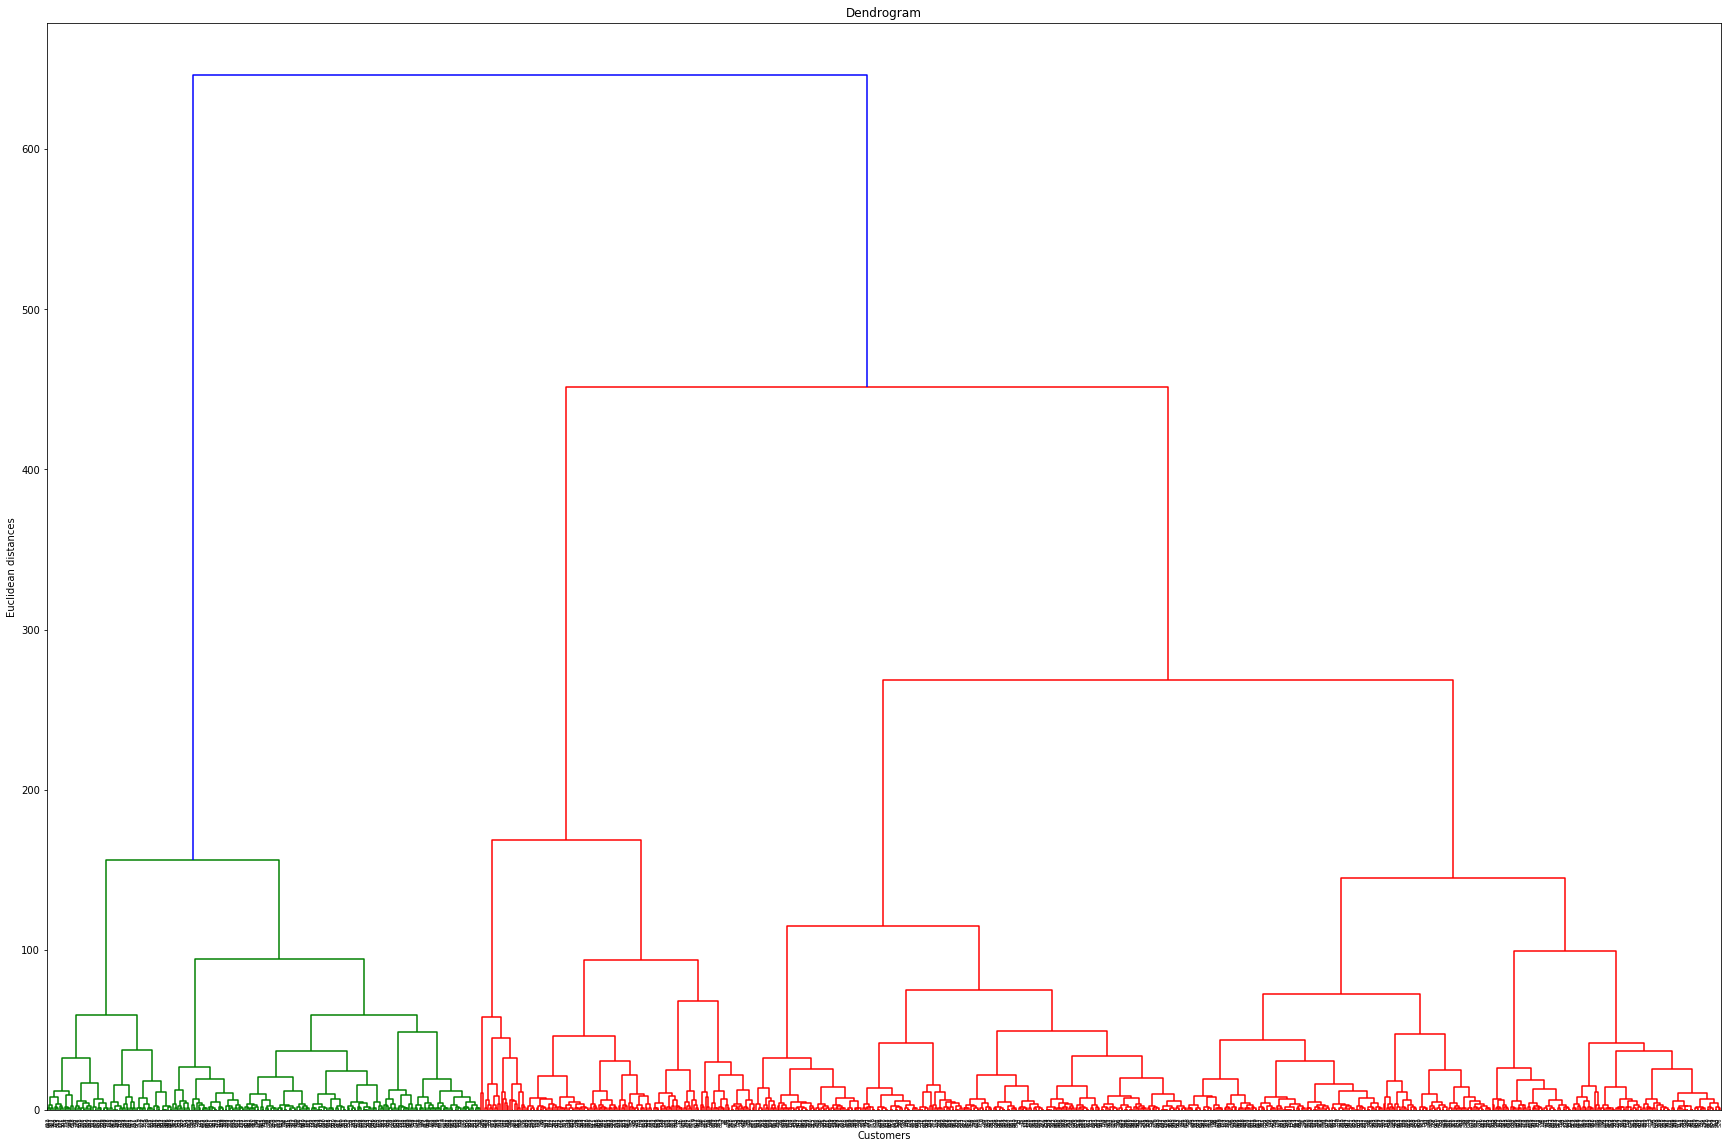

In [919]:
plt.figure(figsize=(30,20))
dendrogram1 = sch.dendrogram(sch.linkage(x, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [920]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='complete')

In [921]:
y=hc.fit_predict(x)
y

array([1, 1, 3, 0, 1, 1, 3, 0, 4, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0, 0, 1, 1,
       0, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 0, 3, 3, 3, 0, 3, 0, 0, 1, 0, 1,
       0, 4, 0, 1, 1, 3, 0, 1, 0, 1, 1, 0, 3, 0, 4, 2, 1, 0, 4, 1, 4, 4,
       0, 1, 4, 0, 4, 4, 0, 4, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 1,
       1, 3, 1, 2, 1, 0, 3, 3, 4, 1, 1, 4, 1, 1, 3, 4, 3, 1, 3, 4, 1, 4,
       3, 4, 0, 0, 3, 1, 3, 3, 0, 1, 3, 3, 3, 4, 1, 3, 1, 1, 3, 0, 3, 0,
       1, 3, 1, 0, 0, 4, 1, 4, 1, 4, 0, 4, 1, 2, 3, 1, 1, 3, 1, 1, 1, 0,
       1, 1, 1, 4, 1, 4, 1, 3, 0, 0, 3, 3, 0, 1, 1, 1, 1, 3, 3, 1, 0, 3,
       0, 1, 1, 3, 1, 0, 0, 1, 0, 4, 1, 4, 0, 3, 4, 3, 4, 1, 1, 4, 1, 0,
       0, 1, 1, 1, 1, 1, 4, 1, 1, 3, 3, 4, 1, 2, 0, 4, 3, 3, 3, 0, 1, 4,
       1, 3, 0, 1, 0, 0, 1, 4, 1, 3, 1, 0, 1, 3, 3, 1, 4, 4, 0, 1, 1, 3,
       0, 4, 1, 1, 1, 1, 4, 4, 0, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 3,
       1, 4, 1, 1, 3, 1, 4, 4, 0, 1, 3, 1, 3, 4, 1, 4, 0, 0, 1, 1, 0, 3,
       3, 1, 1, 1, 1, 1, 4, 1, 1, 4, 0, 1, 0, 3, 1,

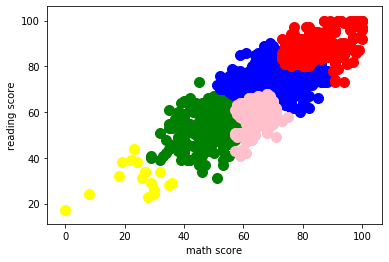

In [926]:
plt.scatter(x[y==0, 0], x[y==0, 1], s=100, c='green')
plt.scatter(x[y==1, 0], x[y==1, 1], s=100, c='blue')
plt.scatter(x[y==2, 0], x[y==2, 1], s=100, c='yellow')
plt.scatter(x[y==3, 0], x[y==3, 1], s=100, c='red')
plt.scatter(x[y==4, 0], x[y==4, 1], s=100, c='pink')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()

In [927]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)

In [1117]:
dbscan.fit(x)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [1118]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1,  0, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [1119]:
import matplotlib.pyplot as pl
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)
pca_2d

array([[ -6.23023123,   2.03437973],
       [-16.49065885, -13.05613468],
       [-35.13211142,  -2.17053658],
       ...,
       [  3.86281062,  -6.21974084],
       [ -7.48057218,  -5.06749661],
       [-19.51452326,  -4.63851958]])

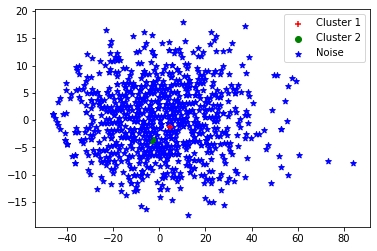

In [1120]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
    

In [947]:
df

,gender,race_or_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,4,0,0,72,72,74
1,0,2,3,0,1,69,90,88
2,0,1,5,0,0,90,95,93
3,1,0,2,1,0,47,57,44
4,1,2,3,0,0,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95
996,1,2,1,1,0,62,55,55
997,0,2,1,1,1,59,71,65
998,0,3,3,0,1,68,78,77


In [957]:
fem=[];mal=[]
for i in range(df.shape[0]):
    if(df['gender'][i] == 0):
        fem.append(df['race_or_ethnicity'][i])
    else:
        mal.append(df['race_or_ethnicity'][i])
        

In [964]:
count_f = [0,0,0,0,0]

for i in fem:
    if i == 0:
        count_f[0] += 1
    if(i == 1):
        count_f[1] += 1
    if(i == 2):
        count_f[2] += 1
    if(i == 3):
        count_f[3] += 1
    if(i == 4):
        count_f[4] += 1
    
count_f 

[36, 104, 180, 129, 69]

In [966]:
count_m = [0,0,0,0,0]

for i in mal:
    if i == 0:
        count_m[0] += 1
    if(i == 1):
        count_m[1] += 1
    if(i == 2):
        count_m[2] += 1
    if(i == 3):
        count_m[3] += 1
    if(i == 4):
        count_m[4] += 1
    
count_m 

[53, 86, 139, 133, 71]

In [981]:
race=[]
for i in range(5):
    race.append([count_f[i],count_m[i]])

In [994]:
race = np.array(race)
race[:,0]

array([ 36, 104, 180, 129,  69])

In [1033]:
race[:,1]

array([ 53,  86, 139, 133,  71])

Text(0, 0.5, 'Number of female')

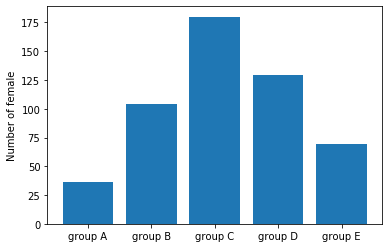

In [1006]:
plt.bar((0,1,2,3,4), race[:,0], tick_label=['group A', 'group B', 'group C', 'group D', 'group E',])
plt.ylabel('Number of female')

Text(0, 0.5, 'Number of male')

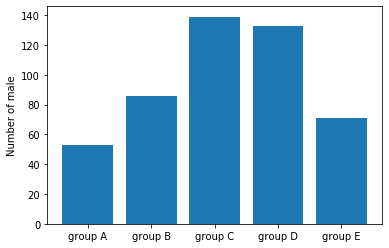

In [1035]:
plt.bar(np.arange(5), race[:,1], tick_label=['group A', 'group B', 'group C', 'group D', 'group E',])
plt.ylabel('Number of male')

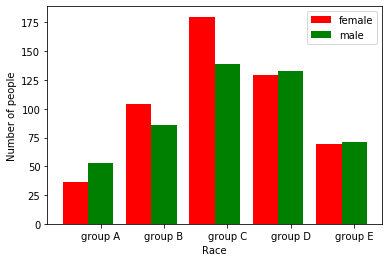

In [1152]:
ax = plt.subplot(111)
ax.bar((0,1,2,3,4), race[:,0], color='r', align='edge',width = 0.4,label = 'female')
ax.bar((0.6,1.6,2.6,3.6,4.6), race[:,1], color='green', align='center',width = 0.4, label='male',tick_label=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.legend()
plt.xlabel('Race')
plt.ylabel('Number of people')

plt.show()

In [1063]:
math_avg = df['math_score'].mean()

In [1081]:
reading_avg = df['reading_score'].mean()
writing_avg = df['writing_score'].mean()

avg_scores = [math_avg, reading_avg, writing_avg]

In [1082]:
m=0;total=[]
for j in range(5,8):
    m = 0
    for i in range(df.shape[0]):
        if(df[df.columns[j]][i] >= avg_scores[j - 5]):
            m += 1
    total.append(m)    
total              

[493, 513, 512]

Text(0, 0.5, 'Number of students above the average mark in each category')

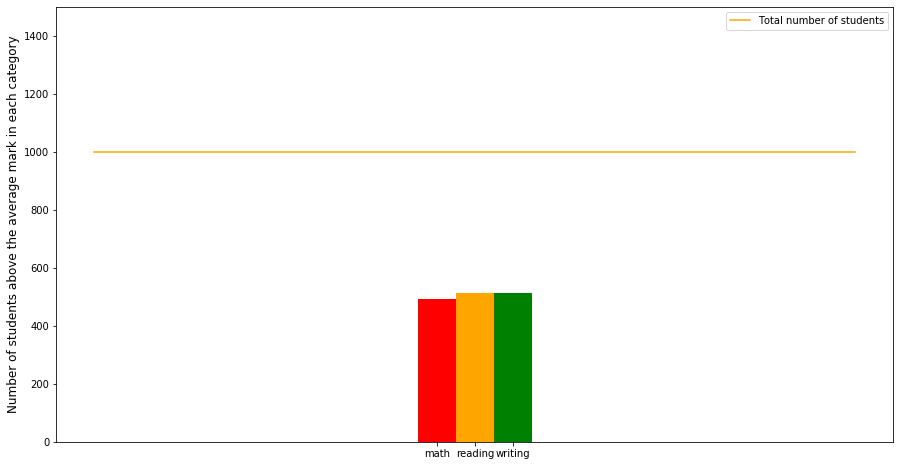

In [1164]:
plt.figure(figsize=(15,8))
plt.bar([0.9,1,1.1],total,width = 0.1,tick_label=['math', 'reading', 'writing'],color=['red','orange','green'])
plt.plot([0,2],[df.shape[0],df.shape[0]],c='orange',label='Total number of students')
plt.legend(loc='best')
plt.ylim(0,1500)
plt.ylabel('Number of students above the average mark in each category',size=12)

In [1165]:
m=[];f=[]
for i in range(df.shape[0]):
    if(df['gender'][i] == 1):
        m.append(i)
    else:
        f.append(i)

In [1175]:
m_race=[];count0=0;count1=0;count2=0;count3=0;count4=0
for i in m:
    if(df['race_or_ethnicity'][i] == 0):
        count0 += 1
    elif(df['race_or_ethnicity'][i] == 1):
        count1 += 1
    elif(df['race_or_ethnicity'][i] == 2):
        count2 += 1
    elif(df['race_or_ethnicity'][i] == 3):
        count3 += 1
    elif(df['race_or_ethnicity'][i] == 4):
        count4 += 1    
m_race=[count0,count1,count2,count3,count4]    
m_race

[53, 86, 139, 133, 71]

In [1174]:
f_race=[];count0=0;count1=0;count2=0;count3=0;count4=0
for i in f:
    if(df['race_or_ethnicity'][i] == 0):
        count0 += 1
    elif(df['race_or_ethnicity'][i] == 1):
        count1 += 1
    elif(df['race_or_ethnicity'][i] == 2):
        count2 += 1
    elif(df['race_or_ethnicity'][i] == 3):
        count3 += 1
    elif(df['race_or_ethnicity'][i] == 4):
        count4 += 1    
f_race=[count0,count1,count2,count3,count4]    
f_race

[36, 104, 180, 129, 69]

<BarContainer object of 5 artists>

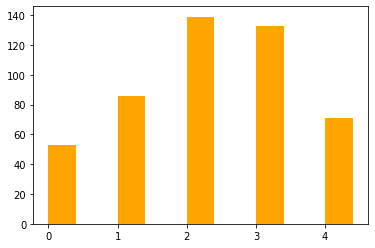

In [1185]:
plt.bar([0,1,2,3,4],m_race,width=0.4,align='edge',color='orange')
#plt.bar([0.6,1.6,2.6,3.6,4.6],f_race,width=0.4)

In [1195]:
gender = m_race+f_race

In [1204]:
gender

[53, 86, 139, 133, 71, 36, 104, 180, 129, 69]

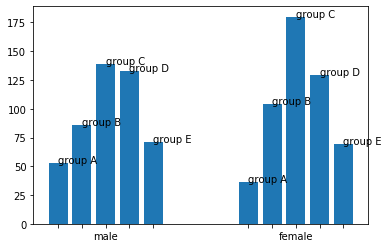

In [1266]:
import matplotlib
plt.bar([0,1,2,3,4,8,9,10,11,12],gender,tick_label=['','','male','','','','','female','',''])
s = ['group A','group B','group C','group D','group E','group A','group B','group C','group D','group E']
d=gender
n = [0,1,2,3,4,8,9,10,11,12]
for i in range(len(s)):
    plt.annotate(str(s[i]), xy=(n[i],d[i]))

plt.show()